### Homework_7 - Santiago Tabares
**1036666894**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow import one_hot
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint


In [11]:
import pandas as pd
df=pd.read_csv('kc_house_data.csv',sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21615.0,4.579945e+09,2.876672e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21615.0,5.400672e+05,3.671167e+05,7.500000e+04,3.215000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21615.0,3.370807e+00,9.300256e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21615.0,2.114724e+00,7.701355e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21615.0,2.079875e+03,9.184021e+02,2.900000e+02,1.428500e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21614.0,1.511002e+04,4.142026e+04,5.200000e+02,5.040000e+03,7.620000e+03,1.069350e+04,1.651359e+06
floors,21615.0,1.494263e+00,5.399848e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21615.0,7.541059e-03,8.651323e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21615.0,2.342817e-01,7.662854e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21615.0,3.409577e+00,6.508928e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [13]:
df.shape

(21615, 21)

In [14]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df.isna().sum()
df = df.dropna()
df[df.duplicated()]
df = df.drop_duplicates()

In [16]:
df.shape

(21612, 21)

<AxesSubplot:>

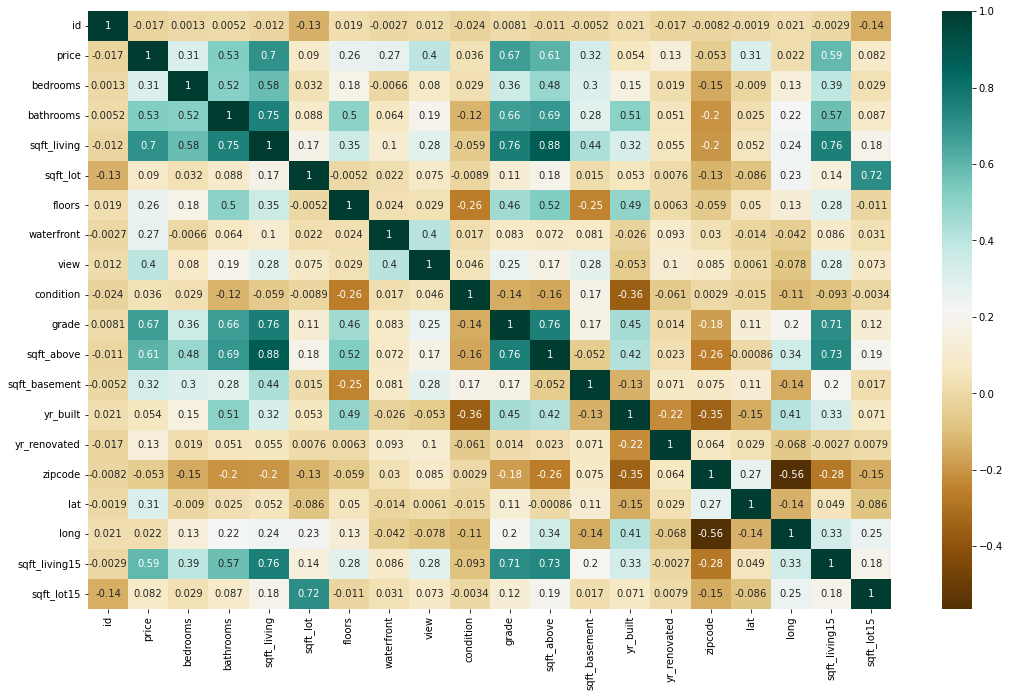

In [18]:
plt.figure(figsize=(18,11))
correlation_values= df.corr()
sns.heatmap(correlation_values,cmap='BrBG',annot=True)

<AxesSubplot:title={'center':'Number of Bedrooms'}>

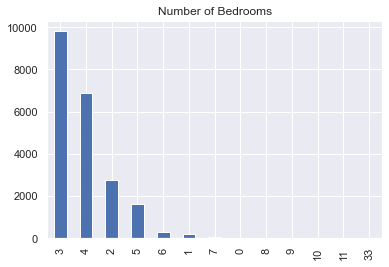

In [37]:
df['bedrooms'].value_counts().plot(kind='bar', title='Number of Bedrooms')

<AxesSubplot:title={'center':'Number of Floors'}>

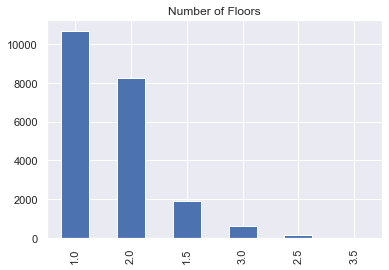

In [39]:
df['floors'].value_counts().plot(kind='bar', title='Number of Floors')

We are going to drop the most correlated features to reduce the total features.

In [ ]:
df=df.drop(['sqft_living','sqft_living15','sqft_lot15','long','grade','view'],axis=1)

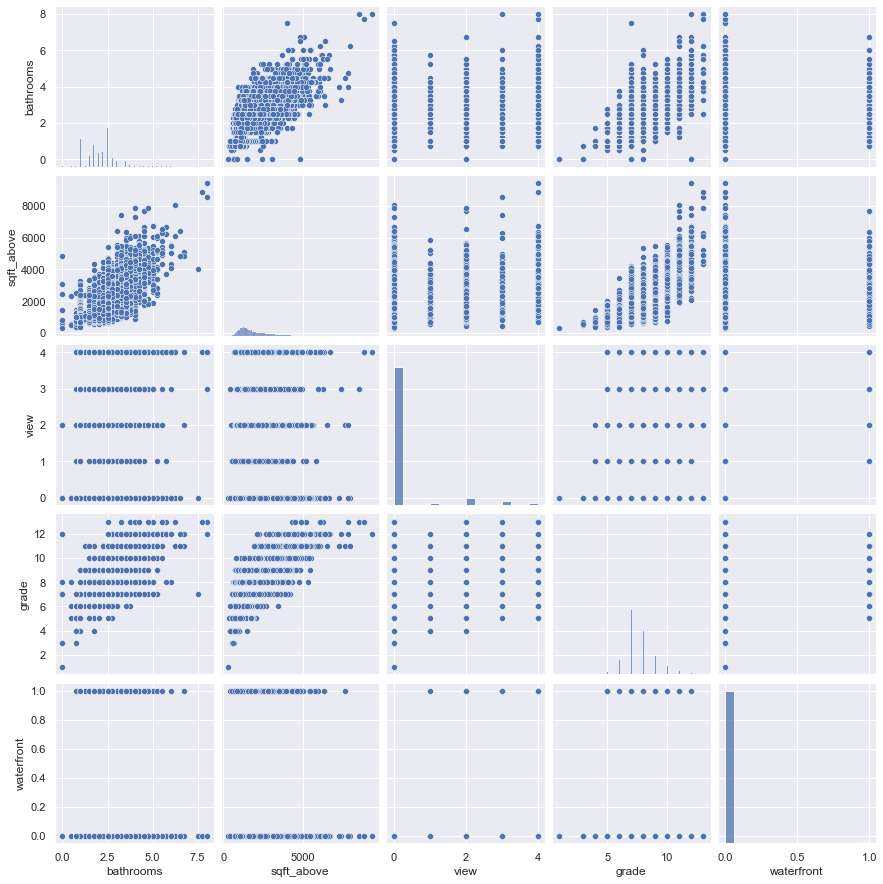

In [27]:
sns.set()
sns.pairplot(df[["bathrooms", "sqft_above","view", "grade","waterfront"]], height = 2.5)
plt.show()

<AxesSubplot:>

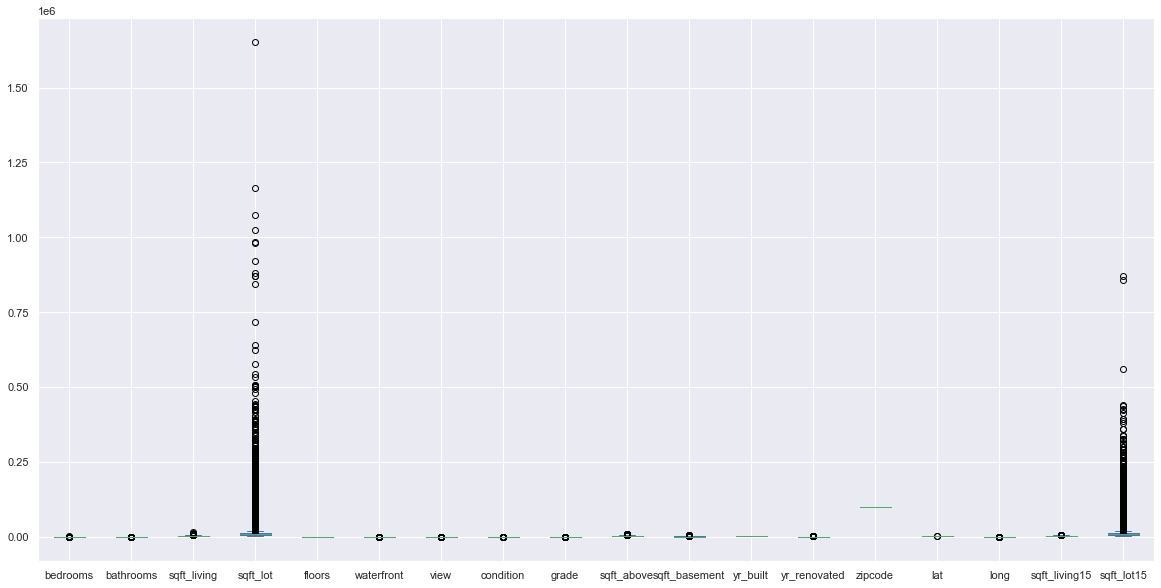

In [28]:
df.drop(['id','price'],axis=1).plot(kind='box', figsize=(20,10))

### Droping outliers

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

zscore_outliers=(df[(np.abs(stats.zscore(df['bathrooms'])) > 3)].shape[0]/df.shape[0])*100
print(round(zscore_outliers,2))

0.87


In [41]:
df_outliers = df[((df['sqft_lot'] < (Q1['sqft_lot'] - 1.5 * IQR['sqft_lot'])) | (df['sqft_lot'] > (Q3['sqft_lot'] + 1.5 * IQR['sqft_lot'])))]
df_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930.0,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
12,114101516,20140528T000000,310000.0,3,1.00,1430,19901.0,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867.0,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
36,9435300030,20140528T000000,550000.0,4,1.00,1660,34848.0,1.0,0,0,...,5,930,730,1933,0,98052,47.6621,-122.132,2160,11467
41,7766200013,20140811T000000,775000.0,4,2.25,4220,24186.0,1.0,0,0,...,8,2600,1620,1984,0,98166,47.4450,-122.347,2410,30617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,2413910120,20140702T000000,915000.0,3,4.50,3850,62726.0,2.0,0,0,...,10,3120,730,2013,0,98053,47.6735,-122.058,2630,46609
21508,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017.0,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
21522,7237550100,20140825T000000,1408760.0,4,4.00,4920,50621.0,2.0,0,0,...,10,4280,640,2012,0,98053,47.6575,-122.006,4920,74052
21527,2625069038,20141124T000000,1450000.0,4,3.50,4300,108865.0,2.0,0,0,...,11,4300,0,2014,0,98074,47.6258,-122.005,4650,107498


In [54]:
df = df[~df['id'].isin(df_outliers['id'])]

In [56]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21611,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:ylabel='price'>

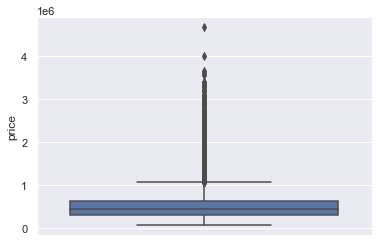

In [61]:
sns.boxplot(y='price',data=df)

In [68]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [149]:
cols = ['bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']

X_data = df[cols].to_numpy()
y_data = df[['price']].to_numpy()

# split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

print(np.shape(X_train))
print(np.shape(y_train))

print(X_data)

(15349, 8)
(15349, 1)
[[1.00e+00 1.18e+03 1.00e+00 ... 1.18e+03 0.00e+00 1.34e+03]
 [2.25e+00 2.57e+03 2.00e+00 ... 2.17e+03 4.00e+02 1.69e+03]
 [1.00e+00 7.70e+02 1.00e+00 ... 7.70e+02 0.00e+00 2.72e+03]
 ...
 [7.50e-01 1.02e+03 2.00e+00 ... 1.02e+03 0.00e+00 1.02e+03]
 [2.50e+00 1.60e+03 2.00e+00 ... 1.60e+03 0.00e+00 1.41e+03]
 [7.50e-01 1.02e+03 2.00e+00 ... 1.02e+03 0.00e+00 1.02e+03]]


In [150]:
my_checkpoint=ModelCheckpoint('SantiagoTabares_Homework_7.h5',
                           save_weights_only=False,
                           frequency='epoch',
                           verbose=1)
tf.random.set_seed(42) 

In [154]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=20,activation='relu',name='hidden_layer1'), 
                  Dense(units=20,activation='relu',name='hidden_layer2'), 
                  Dense(units=1,activation='linear',name='output_layer')
                 ])
    return model

In [155]:
def compile_model(model):
    model.compile(optimizer='rmsprop', loss="mae", metrics=["mae","mape"])

In [156]:
model=get_model(input_shape=X_train.shape[1])
compile_model(model)

In [157]:
history=model.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=True)

Epoch 1/50
432/432 [==============================] - 1s 1ms/step - loss: 477682.9688 - mae: 477682.9688 - mape: 91.3584 - val_loss: 394356.2500 - val_mae: 394356.2500 - val_mape: 72.2099
Epoch 2/50
432/432 [==============================] - 0s 1ms/step - loss: 236681.8594 - mae: 236681.8594 - mape: 42.5260 - val_loss: 156950.7656 - val_mae: 156950.7656 - val_mape: 32.8279
Epoch 3/50
432/432 [==============================] - 0s 995us/step - loss: 158036.0938 - mae: 158036.0938 - mape: 33.0443 - val_loss: 156675.6562 - val_mae: 156675.6562 - val_mape: 32.5328
Epoch 4/50
432/432 [==============================] - 0s 1ms/step - loss: 157827.6719 - mae: 157827.6719 - mape: 32.9926 - val_loss: 156565.7344 - val_mae: 156565.7344 - val_mape: 31.8598
Epoch 5/50
432/432 [==============================] - 0s 967us/step - loss: 157707.0156 - mae: 157707.0156 - mape: 32.9127 - val_loss: 156902.2188 - val_mae: 156902.2188 - val_mape: 33.0110
Epoch 6/50
432/432 [==============================] - 0s

In [158]:
def plot_metrics(history):
    fig,ax=plt.subplots(1,2,figsize=(14,8))
    ax[0].plot(history.history['val_mape'], label="validation")
    ax[0].plot(history.history['mape'], label="training")
    ax[0].set_ylabel('Mape', fontsize=15)
    ax[0].set_xlabel('Epoch', fontsize=15)
    ax[0].legend()
    ax[0].grid()

    ax[1].plot(history.history['val_mae'], label="validation")
    ax[1].plot(history.history['mae'], label="training")
    ax[1].set_ylabel('Mae', fontsize=15)
    ax[1].set_xlabel('Epoch', fontsize=15)
    ax[1].legend()
    ax[1].grid()


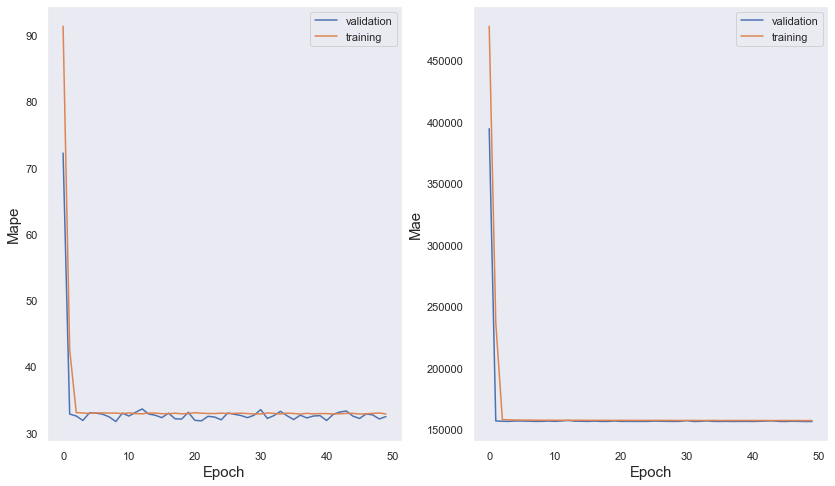

In [159]:
plot_metrics(history)

In [160]:
model.evaluate(X_test,y_test)

120/120 [==============================] - 0s 819us/step - loss: 159789.9844 - mae: 159789.9844 - mape: 32.7682


[159789.984375, 159789.984375, 32.76824188232422]

In [161]:
def get_model_reg(input_shape,wd):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=20,activation='relu',kernel_regularizer = regularizers.l2(wd), name='hidden_layer1'),   
                  Dense(units=1,activation='linear',name='output_layer')
                 ])
    return model

In [162]:
model=get_model_reg(input_shape=X_train.shape[1], wd=1e-5)
compile_model(model)

In [163]:
history=model.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=True)

Epoch 1/50
432/432 [==============================] - 1s 1ms/step - loss: 511204.5000 - mae: 511204.5000 - mape: 98.9124 - val_loss: 505869.7500 - val_mae: 505869.7500 - val_mape: 97.1601
Epoch 2/50
432/432 [==============================] - 0s 1ms/step - loss: 489697.5000 - mae: 489697.5000 - mape: 94.1107 - val_loss: 474949.7188 - val_mae: 474949.7188 - val_mape: 90.2302
Epoch 3/50
432/432 [==============================] - 0s 966us/step - loss: 450458.7812 - mae: 450458.7812 - mape: 85.2670 - val_loss: 426127.9375 - val_mae: 426127.9375 - val_mape: 79.2883
Epoch 4/50
432/432 [==============================] - 0s 1ms/step - loss: 393359.8750 - mae: 393359.8750 - mape: 72.4699 - val_loss: 359392.1562 - val_mae: 359392.1562 - val_mape: 64.3317
Epoch 5/50
432/432 [==============================] - 0s 1ms/step - loss: 318998.0312 - mae: 318998.0312 - mape: 55.8530 - val_loss: 276201.0000 - val_mae: 276201.0000 - val_mape: 46.0293
Epoch 6/50
432/432 [==============================] - 0s 1

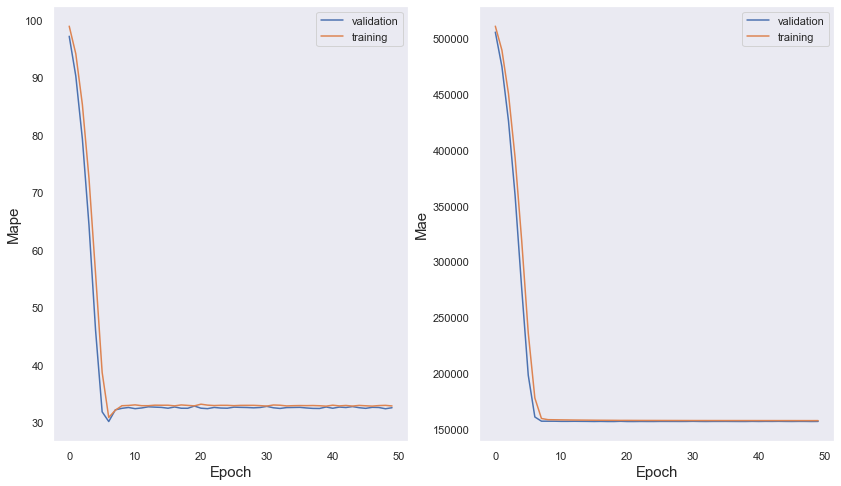

In [164]:
plot_metrics(history)

In [165]:
model.evaluate(X_test,y_test)

120/120 [==============================] - 0s 679us/step - loss: 159980.6250 - mae: 159980.5938 - mape: 32.8863


[159980.625, 159980.59375, 32.88628005981445]